## Probability Distribution Visualization Project ##

### Question 1: Subtraction of Normal Distributions ###

A statistics student of mine asked me a question about how we deal with adding and subtracting normal distributions. I think it is intuitive for most people that the mean of the difference is the difference of the means. That is, the average difference is just the difference of the averages. However, understanding how the standard deviations interact is not nearly as intuitive, especially to those new to statistics. Why on earth are the standard deviations added together in the formula when we are subtracting? What is a Pythagorean sum, anyway?

Since students are often taught statistics before calculus (do not let me on this soapbox), showing students a proof is often not helpful. Fortunately, pseudo-random number generators can sample in real time, and students can witness evidence for the formulas they are given in real time. Obviously, this is not a rigorous proof. But let's be real -- mathematical intuition doesn't start with proofs for most people. For most of us mortals, it starts with pictures.

In the code block below, the user is able to define a list of sample sizes, as well as the mean and standard deviation for two normal distributions. Then, they can sit back and see how the sample of differences interacts with the theoretical differences in mean and standard deviation.

In [1]:
# Necessary imports

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math
from scipy.stats import norm
import time
from IPython.display import clear_output


Theoretical Mean:  5.5
Theoretical Stdev:  3.905124837953327
Sample Size:  10
Mean:  4.417965007635768
Stdev: 2.122638556294689


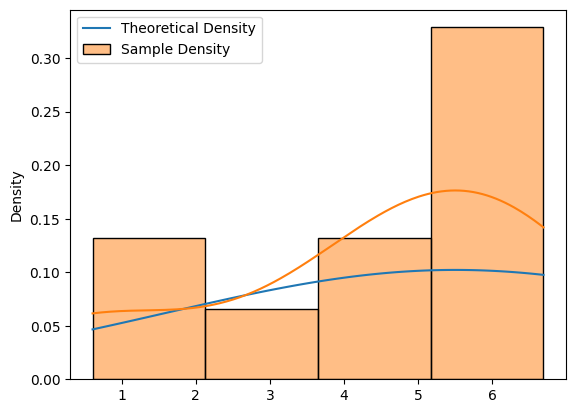

Theoretical Mean:  5.5
Theoretical Stdev:  3.905124837953327
Sample Size:  100
Mean:  5.303011691891132
Stdev: 4.09526165272421


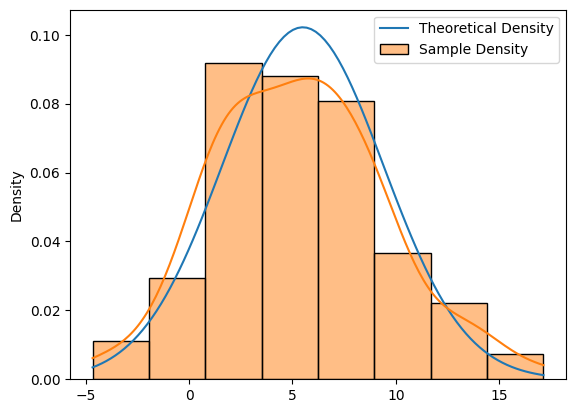

Theoretical Mean:  5.5
Theoretical Stdev:  3.905124837953327
Sample Size:  1000
Mean:  5.2647999945373325
Stdev: 3.9280333062136368


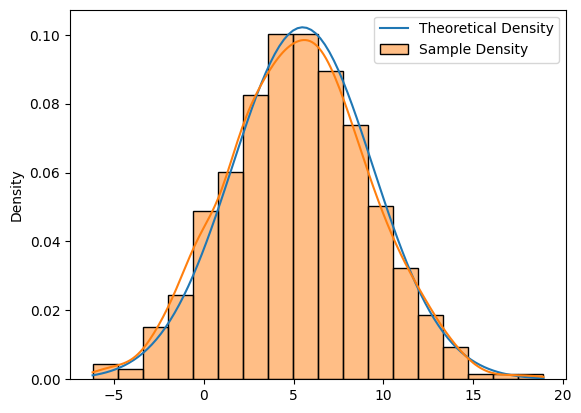

Theoretical Mean:  5.5
Theoretical Stdev:  3.905124837953327
Sample Size:  10000
Mean:  5.512804914888832
Stdev: 3.8736265644136694


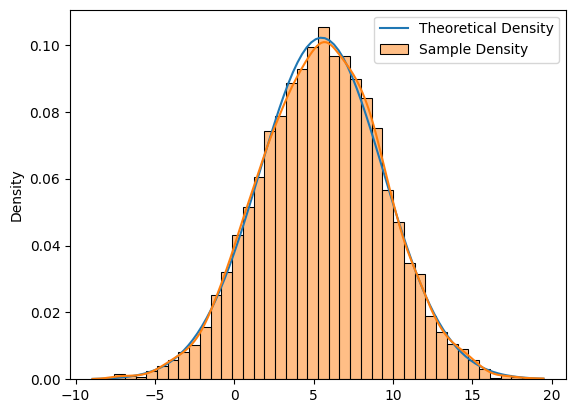

Theoretical Mean:  5.5
Theoretical Stdev:  3.905124837953327
Sample Size:  100000
Mean:  5.485159559932067
Stdev: 3.8928176632418054


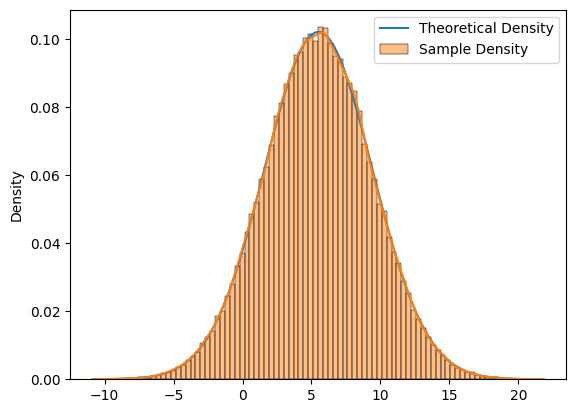

Theoretical Mean:  5.5
Theoretical Stdev:  3.905124837953327
Sample Size:  1000000
Mean:  5.497888989744626
Stdev: 3.9064843594479415


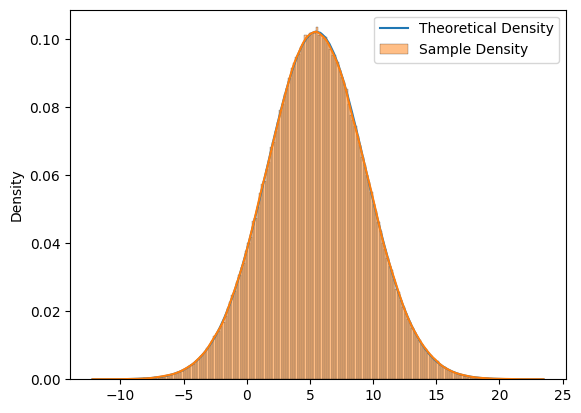

In [3]:
# This is a static version of the animated display that follows
# Shows an apporximation of what you will see in the animation that follows

# Define the sample sizes you want to cycle through
sample_sizes = [10, 100, 1000, 10000, 100000, 1000000]

# Define the means and standard deviations for your two distributions
mean_1, sd_1 = 70, 3
mean_2, sd_2 = 64.5, 2.5

# Create a new figure
plt.figure()

for sample_size in sample_sizes:
        # Generate data points for the two distributions
        data_points_1 = np.random.normal(mean_1, sd_1, size=sample_size)
        data_points_2 = np.random.normal(mean_2, sd_2, size=sample_size)

        # Calculate the differences between the two distributions
        differences = [(data_points_1[i] - data_points_2[i]) for i in range(len(data_points_1))]

        # Print the mean and standard deviation of the differences
        print('Theoretical Mean: ', mean_1 - mean_2)
        print('Theoretical Stdev: ', math.sqrt(sd_1**2 + sd_2**2))
        print('Sample Size: ', sample_size)
        print('Mean: ', np.mean(differences))
        print('Stdev:', np.std(differences))

        # Plot the density of the differences
        x_axis = np.linspace(min(differences), max(differences), 100)
        plt.plot(x_axis, norm.pdf(x_axis, mean_1 - mean_2, math.sqrt(sd_1**2 + sd_2**2)), label='Theoretical Density')
        sns.histplot(data=differences, stat='density', bins = 2 * math.floor(len(differences) ** (1/3)), kde=True, color='tab:orange', label='Sample Density')

        # Add a legend
        plt.legend()

        # Show the plot
        plt.show()

In [2]:

# Define the sample sizes you want to cycle through
sample_sizes = [10, 100, 1000, 10000, 100000, 1000000]

# Define the means and standard deviations for your two distributions
mean_1, sd_1 = 70, 3
mean_2, sd_2 = 64.5, 2.5

# Create a new figure
plt.figure()

# Loop over the sample sizes
while True:
    for sample_size in sample_sizes:
        # Generate data points for the two distributions
        data_points_1 = np.random.normal(mean_1, sd_1, size=sample_size)
        data_points_2 = np.random.normal(mean_2, sd_2, size=sample_size)

        # Calculate the differences between the two distributions
        differences = [(data_points_1[i] - data_points_2[i]) for i in range(len(data_points_1))]

        # Print the mean and standard deviation of the differences
        print('Theoretical Mean: ', mean_1 - mean_2)
        print('Theoretical Stdev: ', math.sqrt(sd_1**2 + sd_2**2))
        print('Sample Size: ', sample_size)
        print('Mean: ', np.mean(differences))
        print('Stdev:', np.std(differences))

        # Plot the density of the differences
        x_axis = np.linspace(min(differences), max(differences), 100)
        plt.plot(x_axis, norm.pdf(x_axis, mean_1 - mean_2, math.sqrt(sd_1**2 + sd_2**2)), label='Theoretical Density')
        sns.histplot(data=differences, stat='density', bins = 2 * math.floor(len(differences) ** (1/3)), kde=True, color='tab:orange', label='Sample Density')

        # Add a legend
        plt.legend()

        # Show the plot
        plt.show()

        # Clear the output
        clear_output(wait=True)

        # Pause for 5 seconds
        time.sleep(5)

        # Clear the current axis
        plt.cla()

KeyboardInterrupt: 